## kNN для задачи классификации

#### 1. Визуализация решающих поверхностей в kNN для наглядного представления, как классификатор принимает решения для новых объектов

Набор данных: встроенный в `sklearn` набор `wine`, содержащий информацию о характеристиках трёх видов вина. Описание набора [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

**1.0 Загрузка набора данных и сохранение информации о признаках в переменную `X`, а о зависимой переменной – в переменную `y`**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**1.1 Обработка пропущенных значений и категориальных переменных**  

In [ ]:
X.isna().any().any()                                                             # no missing values

False

In [ ]:
X[X['proline'] == 0]                                                             # also checked every column for values of 0

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


In [ ]:
mask = (X == 0).values                                                            # the second method to check if there are zeros in columns
np.where(mask == True)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
X.dtypes                                                                         # no object types

,0
alcohol,float64
malic_acid,float64
ash,float64
alcalinity_of_ash,float64
magnesium,float64
total_phenols,float64
flavanoids,float64
nonflavanoid_phenols,float64
proanthocyanins,float64
color_intensity,float64


**1.2 Разделение выборки на тренировочную и тестовую**

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(28)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**1.3 Обучение шести классификаторов kNN, отличающихся числом соседей, на признаках `alcohol` и `magnesium` и евклидовом расстоянии. Вывод доли правильных ответов на тренировочной и тестовой выборках для каждого классификатора.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# find indexes of the needed columns
columns = list(X_train.columns)
alcohol_magnesium = [columns.index('alcohol'), columns.index('magnesium')]
# normalize the dataframe
normalizer = StandardScaler()
normalizer.fit(X_train)                                                           # fit the normalizer to X_train

X_train_transformed = normalizer.transform(X_train)                               # transform X_train using normalizer
X_train = pd.DataFrame(data=X_train_transformed)

X_test_transformed = normalizer.transform(X_test)                                 # transform X_test using normalizer
X_test = pd.DataFrame(data=X_test_transformed)

print('NN', '\t', 'Train', '\t', 'Test')
clfs = []
k_neighbours = [1, 3, 5, 10, 15, 25]

for k in k_neighbours:

  clf = KNeighborsClassifier(n_neighbors=k)
  clfs.append(clf.fit(X_train.loc[:, alcohol_magnesium], y_train))                # fit the classifier and remember it by adding to the list clfs
  y_predicted_train = clf.predict(X_train.loc[:, alcohol_magnesium])              # prediction on train
  y_predicted_test = clf.predict(X_test.loc[:, alcohol_magnesium])                # prediction on test

  print(k, '\t', f"{np.mean(y_train == y_predicted_train):.2f}", '\t', f"{np.mean(y_test == y_predicted_test):.2f}")

NN 	 Train 	 Test
1 	 1.00 	 0.69
3 	 0.83 	 0.74
5 	 0.77 	 0.70
10 	 0.76 	 0.70
15 	 0.75 	 0.69
25 	 0.73 	 0.67


[kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**1.4 Построение сетки (decision regions grid) графиков решающих поверхностей для обученных выше классификаторов**

In [ ]:
!pip install mlxtend==0.19.00

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.1
    Uninstalling mlxtend-0.23.1:
      Successfully uninstalled mlxtend-0.23.1


Также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

Библиотека позволяет визуализировать решающие поверхности обученных классификаторов. [Документация](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки

In [ ]:
import mlxtend

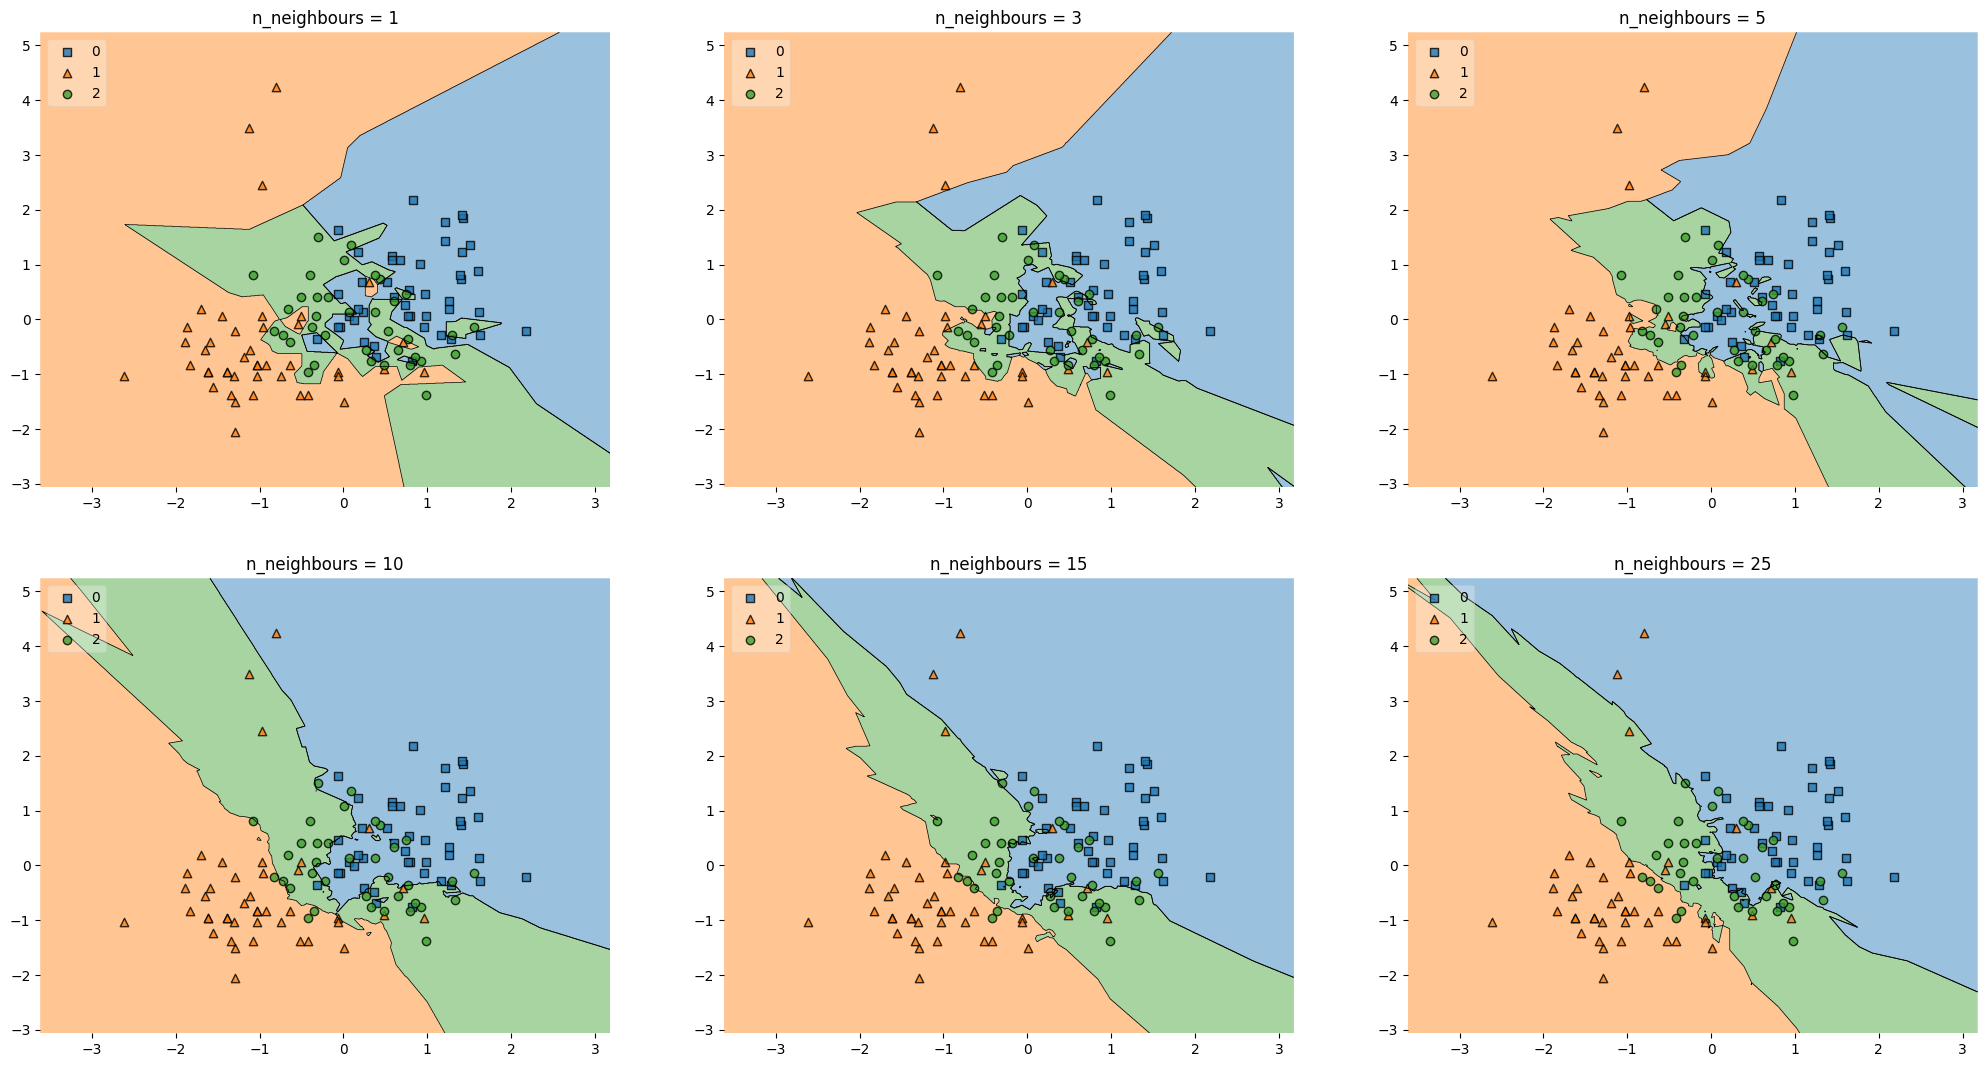

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)                                                      # grid has 2 rows and 3 columns

fig = plt.figure(figsize=(25,13))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']

for clf, lab, grd in zip(clfs,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train.loc[:, alcohol_magnesium].to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

[itertools.product](https://docs.python.org/3/library/itertools.html#itertools.product)
[pandas.DataFrame.to_numpy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)

_Оптимальное для обучения классификатора число соседей - 10, так как accuracy в данном случае имеет меньший разрыв на train и test, и решающая поверхность более гладкая, лучше показывает закономерность, не подстраивается под отдельные объекты или небольшие группы объектов (как при k = 1,3,5); при k = 15,25 разрыв accuracy тоже 0.06, но все-таки значения поменьше._

#### 2. Реализация алгоритма KNN для классификации своими руками

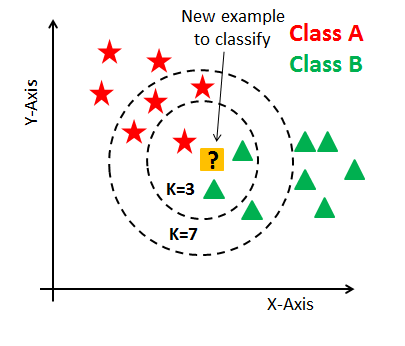

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      def func(X, X_train):                                                       # function that will find k nearest neighbours for every train object
        distance = np.sum((X - self.X_train)**2, axis=1)**(1/2)                   # calculate the distance between test object and train object
        y_distances = sorted(list(zip(self.y_train, distance)), key=lambda x: x[1])   # sort by distances
        return np.array(Counter(y_distances).most_common(self.k)[0][0])[0]        # find most popular answer on the k nearest neighbours
      return np.apply_along_axis(func, 1, X, self.X_train)

[Counter](https://docs.python.org/3/library/collections.html#collections.Counter)

In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
test_knn(KNN)